Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 2.2) 트위터 API로 연관 키워드 분석하기

### 바로가기

- [<Step1. API 호출> : 트위터 API로 데이터 가져오기](#<Step1.-API-호출>-:-트위터-API로-데이터-가져오기)
    - [API 데이터로 데이터 프레임 생성하기]
- [<Step2. 추출> : 키워드 추출](#<Step2.-추출>-:-키워드-추출)
    - [텍스트 데이터 전처리]
    - [nltk, konlpy를 이용한 키워드 추출]
- [<Step3. 분석> : 연관 분석을 이용한 키워드 분석](#<Step3.-분석>-:-연관-분석을-이용한-키워드-분석)
    - [연관 키워드 추출하기]
    - [단어 빈도 추출하기]
- [<Step4. 시각화> : 연관 키워드 네트워크 시각화](#<Step4.-시각화>-:-연관-키워드-네트워크-시각화)
    - [연관 키워드 네트워크 시각화]

-----

In [4]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. API 호출> : 트위터 API로 데이터 가져오기

### [API 데이터로 데이터 프레임 생성하기]
- API 사용법 참고 : https://github.com/yoonkt200/python-data-analysis/blob/master/chapter_text/(%EC%B0%B8%EA%B3%A0)%20using-twitter-api.ipynb
- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install tweepy`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [2]:
!pip install tweepy

-----

##### 트위터 API 가져오기

In [1]:
import tweepy

# 발급 완료된 키를 {your_key} 대신 입력합니다.
CONSUMER_KEY = "{your_key}"
CONSUMER_SECRET = "{your_key}"
ACCESS_TOKEN_KEY = "{your_key}"
ACCESS_TOKEN_SECRET = "{your_key}"

# 개인정보 인증을 요청하는 Handler입니다.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행합니다.
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비입니다.
api = tweepy.API(auth)

-----

##### '손흥민' 키워드 검색

In [2]:
keyword = "손흥민"
tweets = api.search(keyword)
for tweet in tweets:
    print(tweet.text)
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
    print(tweet.created_at)

가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무 
122R206P8 https://t.co/wS1t4uO7mK
[]
[]
2021-06-12 07:28:52
코인세탁소
산업혁명셀프
사이트
인공지능
빨래방
손흥민
그래핀
지도
강남구
광고
세탁소
암
브레이커
사람인
24시
심장
강대국
블로그
사물인터넷
당뇨
지식인
스트레스
빅데이터
merchandise95177 https://t.co/C1SmPRXv1j
[]
[]
2021-06-12 07:17:25
RT @sonny_record: 210611 팬문선답 타래 #손흥민 https://t.co/Lvzwht0VTU
[{'screen_name': 'sonny_record', 'name': '쏘니컷기록', 'id': 2177893836, 'id_str': '2177893836', 'indices': [3, 16]}]
[{'text': '손흥민', 'indices': [33, 37]}]
2021-06-12 07:12:41
가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무 
0H41D3MA https://t.co/0O9jJVpB7b
[]
[]
2021-06-12 07:08:51
함평축구선수
장짐최신영화
증거손흥민
갈천축구
남양읍야설
도이신던스타킹
장성패티쉬
영광마사지 
진도야사
동오아줌마
연남동야동
포항발정난아줌마서울부산대구인천
완도동영상
남양소통
신안케이
서울야노
relate26… https://t.co/BR54bKpMsd
[]
[]
2021-06-12 06:58:57
가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무 
46YT811A https://t.co/Dt1sAf7xUM
[]
[]
2

-----

##### 데이터 프레임 형태로 수집

In [6]:
# 크롤링된 데이터를 저장할 데이터 프레임입니다.
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns=columns)

# 크롤링을 수행할 갯수를 입력하고, Cursor 객체를 사용하여 크롤링을 수행합니다.
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=keyword).items(max_tweets)]

# ‘손흥민’이 포함된 1000개의 트윗들에서, ‘text’, ‘created_at’ 정보를 데이터 프레임으로 저장합니다.
for tweet in searched_tweets:
    tweet_json = tweet._json
    tweet_text = tweet_json['text']
    created = tweet_json['created_at']
    row = [created, tweet_text]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

In [7]:
df.to_csv("tweet_temp.csv", index=False)

-----

# <Step2. 추출> : 키워드 추출

### [텍스트 데이터 전처리]

In [9]:
df = pd.read_csv("tweet_temp.csv")
df.head()

,created,tweet_text
0,Sat Jun 12 07:28:52 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...
1,Sat Jun 12 07:17:25 +0000 2021,코인세탁소\n산업혁명셀프\n사이트\n인공지능\n빨래방\n손흥민\n그래핀\n지도\n강...
2,Sat Jun 12 07:12:41 +0000 2021,RT @sonny_record: 210611 팬문선답 타래 #손흥민 https://...
3,Sat Jun 12 07:08:51 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...
4,Sat Jun 12 06:58:57 +0000 2021,함평축구선수\n장짐최신영화\n증거손흥민\n갈천축구\n남양읍야설\n도이신던스타킹\n장...


In [10]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [11]:
# ‘tweet_text’ 피처에 이를 적용합니다.
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,Sat Jun 12 07:28:52 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...
1,Sat Jun 12 07:17:25 +0000 2021,코인세탁소\n산업혁명셀프\n사이트\n인공지능\n빨래방\n손흥민\n그래핀\n지도\n강...,코인세탁소산업혁명셀프사이트인공지능빨래방손흥민그래핀지도강남구광고세탁소암브레이커사람인시...
2,Sat Jun 12 07:12:41 +0000 2021,RT @sonny_record: 210611 팬문선답 타래 #손흥민 https://...,팬문선답 타래 손흥민
3,Sat Jun 12 07:08:51 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...
4,Sat Jun 12 06:58:57 +0000 2021,함평축구선수\n장짐최신영화\n증거손흥민\n갈천축구\n남양읍야설\n도이신던스타킹\n장...,함평축구선수장짐최신영화증거손흥민갈천축구남양읍야설도이신던스타킹장성패티쉬영광마사지 진도...


-----

### [konlpy를 이용한 키워드 추출]

In [12]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [13]:
# ‘ko_text’ 피처에 이를 적용합니다.
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(1000, 4)


,created,tweet_text,ko_text,nouns
0,Sat Jun 12 07:28:52 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,"[가슴, 경주, 대구, 마사, 마산, 부산, 소통, 야동, 인천, 최신영, 손흥민,..."
1,Sat Jun 12 07:17:25 +0000 2021,코인세탁소\n산업혁명셀프\n사이트\n인공지능\n빨래방\n손흥민\n그래핀\n지도\n강...,코인세탁소산업혁명셀프사이트인공지능빨래방손흥민그래핀지도강남구광고세탁소암브레이커사람인시...,"[코인, 세탁소, 산업혁명, 셀프, 사이트, 인공, 지능, 빨래, 손흥민, 그래핀,..."
2,Sat Jun 12 07:12:41 +0000 2021,RT @sonny_record: 210611 팬문선답 타래 #손흥민 https://...,팬문선답 타래 손흥민,"[문선, 타래, 손흥민]"
3,Sat Jun 12 07:08:51 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,"[가슴, 경주, 대구, 마사, 마산, 부산, 소통, 야동, 인천, 최신영, 손흥민,..."
4,Sat Jun 12 06:58:57 +0000 2021,함평축구선수\n장짐최신영화\n증거손흥민\n갈천축구\n남양읍야설\n도이신던스타킹\n장...,함평축구선수장짐최신영화증거손흥민갈천축구남양읍야설도이신던스타킹장성패티쉬영광마사지 진도...,"[함평, 축구선수, 최신영, 증거, 손흥민, 축구, 남양, 스타킹, 장성, 패티, ..."


-----

# <Step3. 분석> : 연관 분석을 이용한 키워드 분석

### [연관 키워드 추출하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install apriori apyori`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [14]:
!pip install apriori apyori

##### 연관 분석 연습

In [18]:
from apyori import apriori

# 장바구니 형태의 데이터(트랜잭션 데이터)를 생성합니다.
transactions = [
    ['손흥민', '시소코'],
    ['손흥민', '케인'],
    ['손흥민', '케인', '포체티노']
]

# 연관 분석을 수행합니다.
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'포체티노'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'포체티노'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'시소코', '손흥민'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코', '손흥민'}), confidence=0.3333333333333333, lift=1.0), Or

In [19]:
# 지지도 0.5, 신뢰도 0.6, 향상도 1.0 이상이면서 (손흥민, 케인) 처럼 규칙의 크기가 2 이하인 규칙을 추출합니다.
list(apriori(transactions,
             min_support=0.5,
             min_confidence=0.6,
             min_lift=1.0,
             max_length=2))

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'케인', '손흥민'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인', '손흥민'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])]

-----

##### 트위터 연관 키워드 분석

In [20]:
# 트랜잭션 데이터를 추출합니다.
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.
print(transactions)

[['가슴', '경주', '대구', '마사', '마산', '부산', '소통', '야동', '인천', '최신영', '손흥민', '만남', '소개팅', '패티', '만남', '어플', '스타킹', '축구', '축구선수', '울산', '아줌마', '마사지', '스타킹', '동영상', '애무'], ['코인', '세탁소', '산업혁명', '셀프', '사이트', '인공', '지능', '빨래', '손흥민', '그래핀', '지도', '강남구', '광고', '세탁소', '브레이커', '사람인', '심장', '강대국', '블로그', '사물인터넷', '당뇨', '지식인', '스트레스', '빅데이터'], ['문선', '타래', '손흥민'], ['가슴', '경주', '대구', '마사', '마산', '부산', '소통', '야동', '인천', '최신영', '손흥민', '만남', '소개팅', '패티', '만남', '어플', '스타킹', '축구', '축구선수', '울산', '아줌마', '마사지', '스타킹', '동영상', '애무'], ['함평', '축구선수', '최신영', '증거', '손흥민', '축구', '남양', '스타킹', '장성', '패티', '영광', '마사지', '진도', '아줌마', '연남동', '포항', '발정', '아줌마', '부산', '대구인', '완도', '동영상', '남양', '소통', '신안', '케이', '서울', '야노'], ['가슴', '경주', '대구', '마사', '마산', '부산', '소통', '야동', '인천', '최신영', '손흥민', '만남', '소개팅', '패티', '만남', '어플', '스타킹', '축구', '축구선수', '울산', '아줌마', '마사지', '스타킹', '동영상', '애무'], ['카테고리', '프리', '메라', '브라질', '축구', '콜롬비아', '리그', '다드', '축구선수', '브라', '치누', '플라멩구', '콜롬비아', '축구', '스포츠토토', '라이브', '스코어', '브라질', '리그', '해외', '축구', 

In [27]:
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
                       min_support=0.05,
                       min_confidence=0.1,
                       min_lift=5,
                       max_length=2))
print(results)

[RelationRecord(items=frozenset({'국가대표팀', '국가'}), support=0.06740442655935613, ordered_statistics=[OrderedStatistic(items_base=frozenset({'국가'}), items_add=frozenset({'국가대표팀'}), confidence=1.0, lift=14.617647058823529), OrderedStatistic(items_base=frozenset({'국가대표팀'}), items_add=frozenset({'국가'}), confidence=0.9852941176470588, lift=14.617647058823529)]), RelationRecord(items=frozenset({'김신욱', '국가'}), support=0.06740442655935613, ordered_statistics=[OrderedStatistic(items_base=frozenset({'국가'}), items_add=frozenset({'김신욱'}), confidence=1.0, lift=7.705426356589148), OrderedStatistic(items_base=frozenset({'김신욱'}), items_add=frozenset({'국가'}), confidence=0.5193798449612403, lift=7.705426356589148)]), RelationRecord(items=frozenset({'대한민국', '국가'}), support=0.06740442655935613, ordered_statistics=[OrderedStatistic(items_base=frozenset({'국가'}), items_add=frozenset({'대한민국'}), confidence=1.0, lift=13.432432432432432), OrderedStatistic(items_base=frozenset({'대한민국'}), items_add=frozenset({'국가'})

In [28]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,국가대표팀,국가,0.067404
1,김신욱,국가,0.067404
2,대한민국,국가,0.067404
3,동시,국가,0.067404
4,문선,국가,0.067404


-----

### [단어 빈도 추출하기]

##### 말뭉치 추출

In [29]:
# 말뭉치를 추출합니다.
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)

가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무  코인세탁소산업혁명셀프사이트인공지능빨래방손흥민그래핀지도강남구광고세탁소암브레이커사람인시심장강대국블로그사물인터넷당뇨지식인스트레스빅데이터    팬문선답 타래 손흥민 가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무  함평축구선수장짐최신영화증거손흥민갈천축구남양읍야설도이신던스타킹장성패티쉬영광마사지 진도야사동오아줌마연남동야동포항발정난아줌마서울부산대구인천완도동영상남양소통신안케이서울야노 가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무  카테고리아프리메라브라질축구콜롬비아리그라에키다드축구선수브라간치누플라멩구콜롬비아축구스포츠토토라이브스코어브라질리그해외축구프미리어리그브라질세리에토트넘골오오손흥민 옥션번개장터시리즈토토기아그래핀빅데이터브레이커강대국아프리카티비사다리심장모하비스트레스당뇨사물인터넷이승기사람인싼타페강남구손흥민암파워볼    트레이닝세션 손흥민 원주토토단성모하비양평아프리카티비강릉손흥민가평싼타페상원곡기아연천시리즈동해강남구외중방브레이커북하사다리북상옥션서초이승기춘천번개장터하방사람인하원곡시리즈중방파워볼 가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무    여름에 손흥민 민소매 개짱이다 어깨뼈까지 존잘임    트레이닝세션 손흥민    스리랑카전 경기 후 인사 손흥민마이크 켜진줄 모르고 말하는거 ㄱㅇㅇ     여름에 손흥민 민소매 개짱이다 어깨뼈까지 존잘임   아 손흥민 진짜 개멋있어ㅠㅠㅠ열번을 다시 태어나도 축구 할것인가무조건그리고 김신욱 개웃겨 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 함평축구선수

In [30]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'손흥민': 1145, '축구': 456, '선수': 267, '김신욱': 203, '스리랑카': 183, '소리': 160, '노래': 157, '연기': 156, '국가대표팀': 136, '스타킹': 115, '문선': 111, '진짜': 105, '한국': 103, '아줌마': 97, '생각': 97, '축구선수': 88, '만남': 86, '다시': 86, '도하': 84, '잠깐': 78, '차지연': 78, '배우': 78, '부산': 75, '대한민국': 75, '소통': 71, '최신영': 70, '패티': 70, '마사지': 70, '동영상': 70, '토트넘': 69, '유튜브': 68, '동시': 68, '생중계': 68, '국가': 67, '경기': 64, '흥민': 64, '기억': 60, '서울': 55, '여러분': 53, '남양': 52, '시즌': 52, '울산': 51, '트친소': 49, '트레이닝': 48, '세션': 48, '인천': 47, '가슴': 44, '경주': 43, '대구': 43, '마산': 43, '야동': 43, '소개팅': 43, '어플': 43, '애무': 43, '브라질': 43, '미리': 43, '스코어': 42, '인사': 42, '라이브': 41, '마이크': 41, '마사': 40, '챔스': 40, '마음': 39, '타래': 37, '리그': 37, '벤치': 37, '지도': 36, '아무': 34, '대구인': 33, '인생': 33, '아부지': 33, '테이퍼링': 33, '오기': 33, '주식': 33, '조정': 33, '전략': 33, '무조건': 32, '어그': 32, '전이': 32, '챔피언스리그': 32, '아이컨택': 32, '저쪽': 32, '부모님': 32, '자꾸': 32, '덕분': 32, '대리': 32, '어무': 32, '분도': 32, '어머니': 32, '답변': 31, '수준': 31, '실화': 31, '일개': 31, '덕후':

-----

##### 단어 빈도 점수 추가

In [31]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50] # 시각화의 편의를 위해 ‘nodesize’ 50 이하는 제거합니다.
node_df.head()

,node,nodesize
5,부산,75
6,소통,71
9,최신영,70
10,손흥민,1145
11,만남,86


-----

# <Step4. 시각화> : 연관 키워드 네트워크 시각화

### [연관 키워드 네트워크 시각화]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install networkx`
- 혹은 아래의 코드로 라이브러리를 설치합니다.
- networkx 버전 2.3 이하를 설치하는 경우, 아래 코드를 다음과 같이 바꿔주어야 합니다.
    - `sizes = [G.nodes[node]['nodesize']*25 for node in G]` -> `sizes = [G.node[node]['nodesize']*25 for node in G]`

In [32]:
!pip install networkx

-----

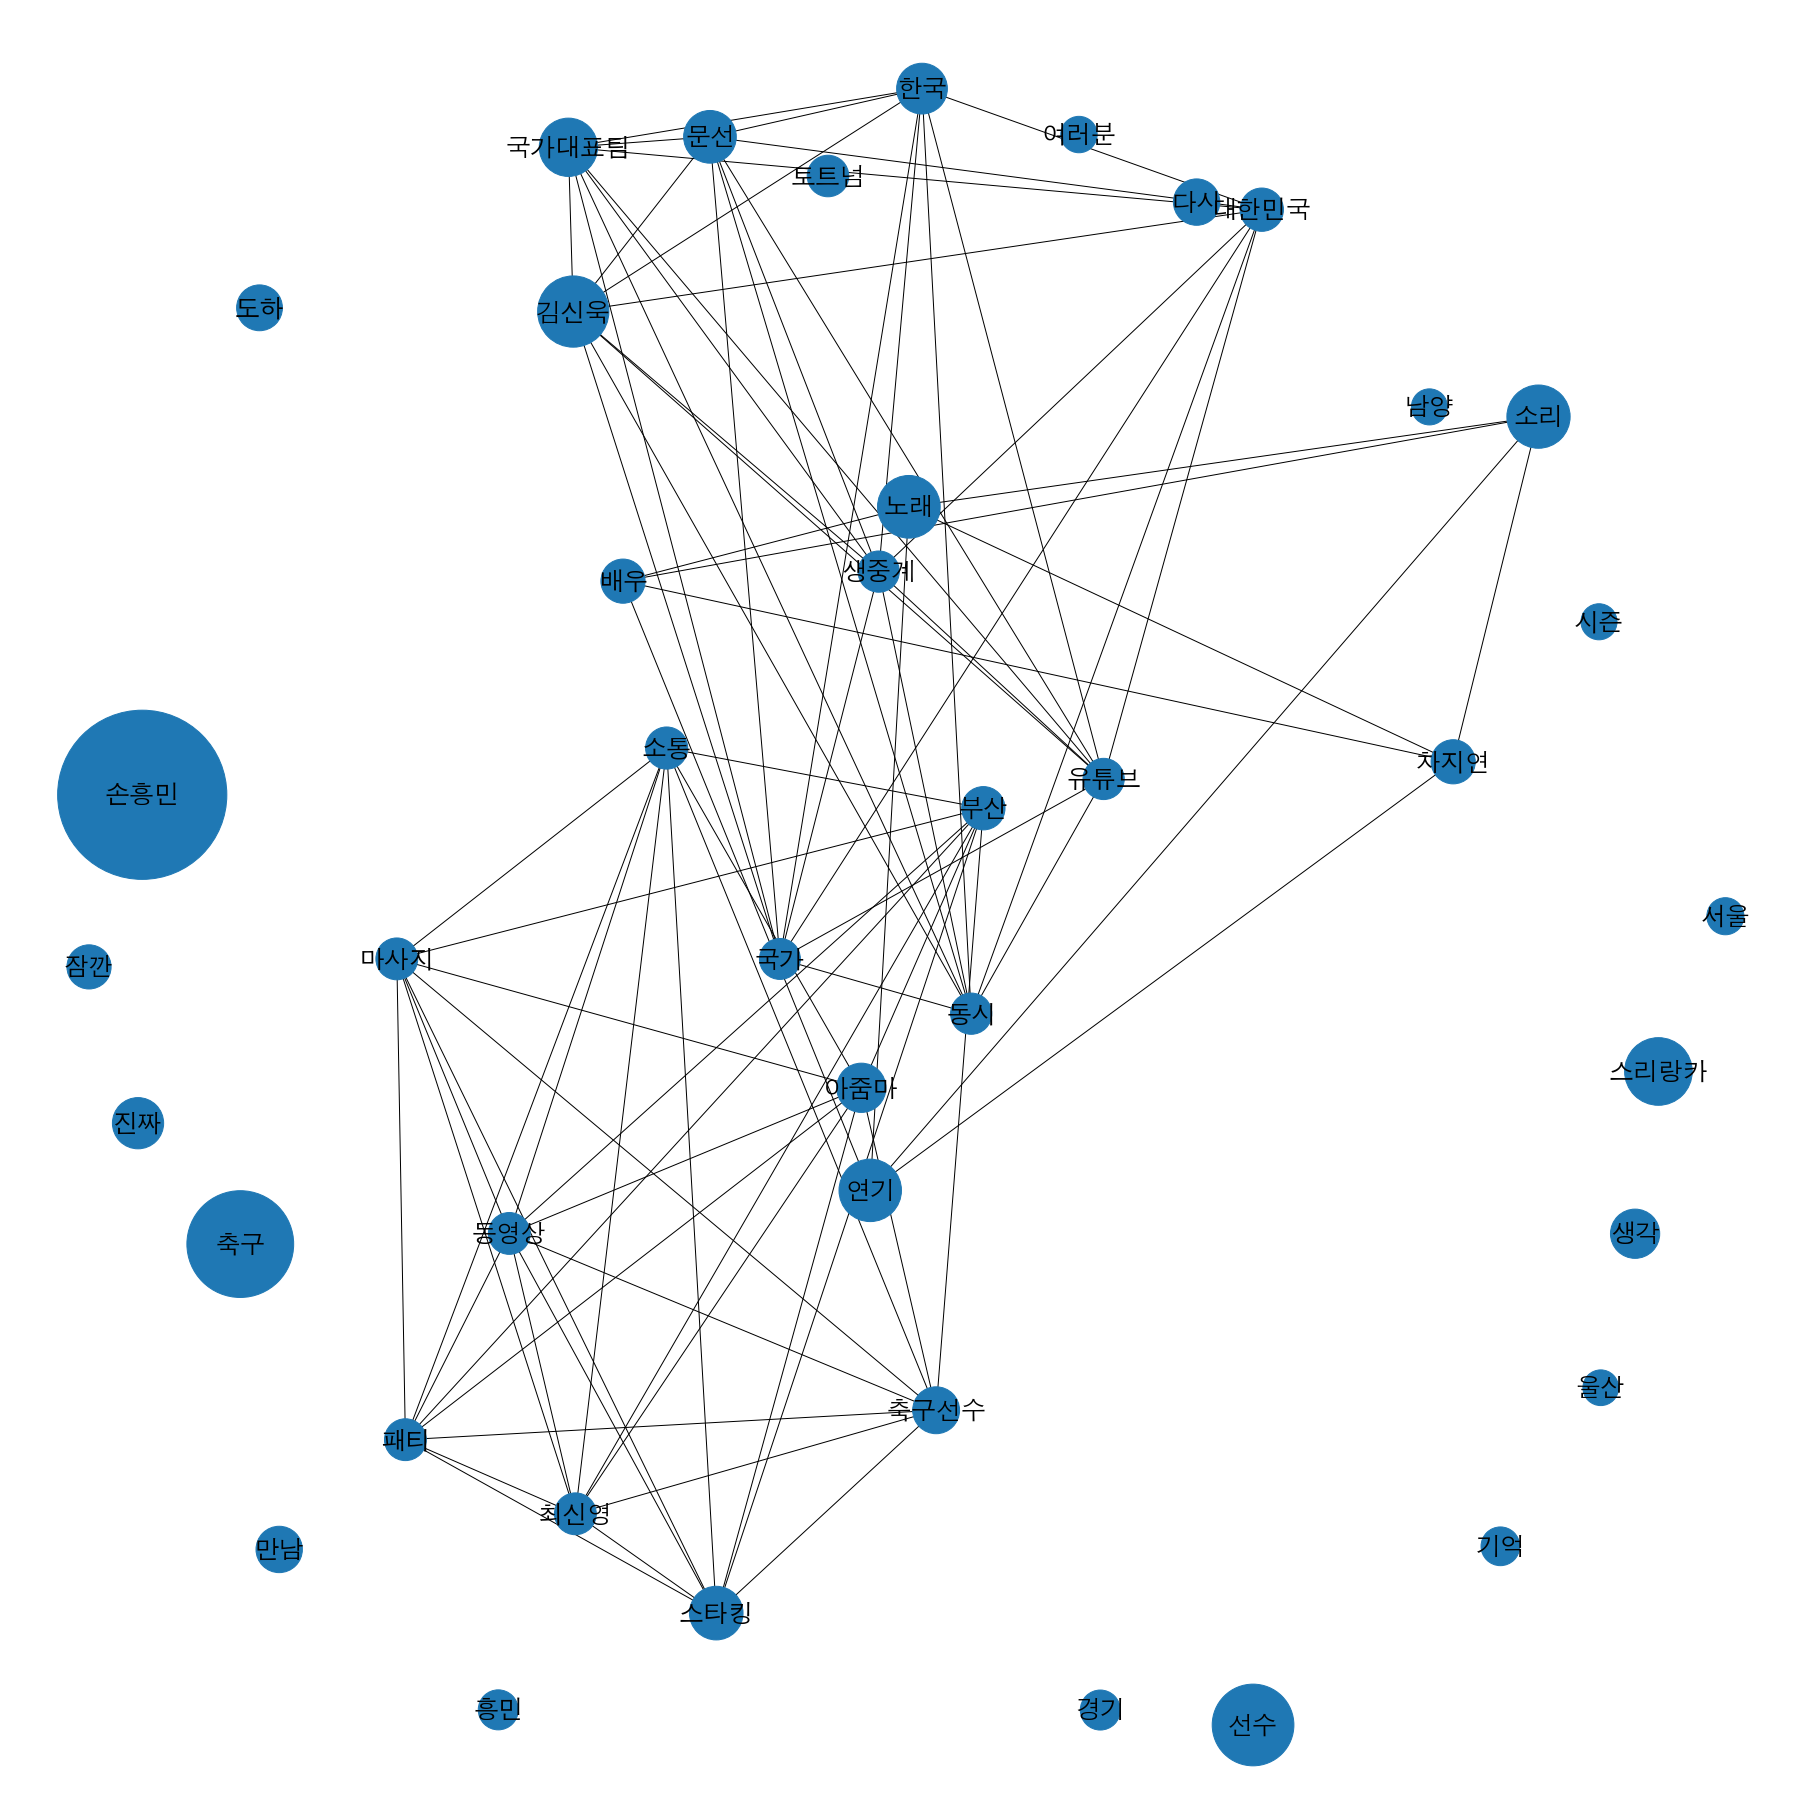

In [33]:
import networkx as nx
plt.figure(figsize=(25,25))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

# Windows 사용자는 AppleGothic 대신,'Malgun Gothic'. 그 외 OS는 OS에서 한글을 지원하는 기본 폰트를 입력합니다.
nx.draw_networkx_labels(G, pos=pos, font_family='AppleGothic', font_size=25)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()